In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from itertools import chain
from collections import Counter
import seaborn as sns

In [2]:
data = pd.read_csv("Dataset/netflix_titles.csv")

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
data.columns

In [ ]:
data.info

In [ ]:
data.info()

In [ ]:
data.describe(include="all")

In [ ]:
data.isna().sum()

In [ ]:
data["director"]

In [ ]:
len(data["director"])

In [ ]:
data[data["director"] == "Mana Yasuda"]

In [ ]:
len(data[data["director"] == "Mana Yasuda"])

## What is the percentage of movies and tv shows available in Netflix?

In [3]:
showType = data["type"]

In [ ]:
showType

In [4]:
perMovies = len(data[data["type"] == "Movie"])/len(data) * 100
perShows = len(data[data["type"] == "TV Show"])/len(data) * 100

In [ ]:
perMovies

In [ ]:
perShows

In [5]:
labels = "Movies", "TV Shows"

In [6]:
sizes = [perMovies, perShows]

([<matplotlib.patches.Wedge at 0x1f3ff74bf10>,
 [Text(-0.6014721132298901, 0.920994732344746, 'Movies'),
  Text(0.6561515843884144, -1.004721403327596, 'TV Shows')],
 [Text(-0.32807569812539455, 0.5023607630971342, '68.4%'),
  Text(0.3827550908932417, -0.586087485274431, '31.6%')])

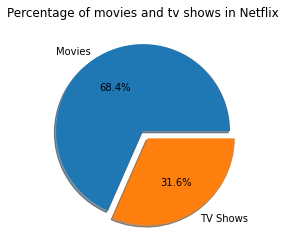

In [7]:
fig1, ax1 = plt.subplots()
ax1.set_title("Percentage of movies and tv shows in Netflix")
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=(0,0.1))

## What are the top 10 categories in Netflix?

In [8]:
category = data["listed_in"].str.split(",")

In [9]:
category

0                   [Children & Family Movies,  Comedies]
1                                       [Stand-Up Comedy]
2                                              [Kids' TV]
3                                              [Kids' TV]
4                                              [Comedies]
                              ...                        
6229    [TV Action & Adventure,  TV Comedies,  TV Sci-...
6230                                        [TV Comedies]
6231                                             [Movies]
6232         [British TV Shows,  TV Comedies,  TV Dramas]
6233                    [Classic & Cult TV,  TV Comedies]
Name: listed_in, Length: 6234, dtype: object

In [10]:
category = data["listed_in"].str.split(",",expand=True)

In [11]:
category

,0,1,2
0,Children & Family Movies,Comedies,None
1,Stand-Up Comedy,None,None
2,Kids' TV,None,None
3,Kids' TV,None,None
4,Comedies,None,None
...,...,...,...
6229,TV Action & Adventure,TV Comedies,TV Sci-Fi & Fantasy
6230,TV Comedies,None,None
6231,Movies,None,None
6232,British TV Shows,TV Comedies,TV Dramas


Removing whitespaces in categories

In [12]:
for col in category.columns:
    category[col] = category[col].str.strip()
category_df = pd.DataFrame(category)

In [13]:
# print(category_df.values.tolist())

Removing None in the list

In [14]:
category_list = []

In [15]:
for i in category_df.values.tolist():
    li = []
    for item in i:
        if item != None:
            li.append(item)
    category_list.append(li)

In [ ]:
# print(category_list)

Combine or chain lists into one list

In [16]:
category_chain = chain.from_iterable(category_list)

Return tuple of count for each category

In [17]:
category_count = Counter(category_chain)

In [18]:
category_count

Counter({'Children & Family Movies': 378,
         'Comedies': 1113,
         'Stand-Up Comedy': 281,
         "Kids' TV": 328,
         'Crime TV Shows': 363,
         'International TV Shows': 1001,
         'Spanish-Language TV Shows': 117,
         'International Movies': 1927,
         'Sci-Fi & Fantasy': 193,
         'Thrillers': 392,
         'Docuseries': 279,
         'Science & Nature TV': 67,
         'Action & Adventure': 597,
         'Dramas': 1623,
         'Cult Movies': 55,
         'Independent Movies': 552,
         'Romantic Movies': 376,
         'Documentaries': 668,
         'Horror Movies': 262,
         'Romantic TV Shows': 278,
         'TV Comedies': 436,
         'TV Dramas': 599,
         'TV Thrillers': 44,
         'TV Mysteries': 69,
         'British TV Shows': 210,
         'Music & Musicals': 243,
         'Reality TV': 153,
         'TV Action & Adventure': 126,
         'Anime Features': 45,
         'Teen TV Shows': 44,
         'Faith & Spiritual

Most common categories

In [19]:
common_categories = dict(category_count.most_common(10))
key = list(common_categories.keys())
value = list(common_categories.values())

<BarContainer object of 10 artists>

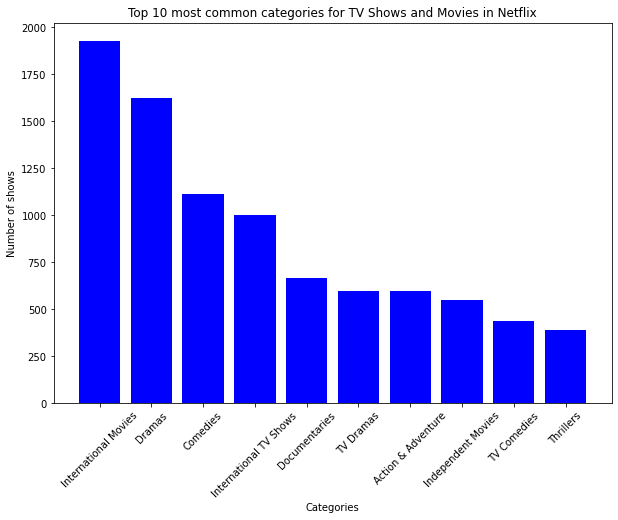

In [20]:
plt.figure(figsize = (10,7))
plt.title("Top 10 most common categories for TV Shows and Movies in Netflix")
plt.xticks(rotation = 45)
plt.xlabel("Categories")
plt.ylabel("Number of shows")
plt.bar(key, value, color='blue')

## Distribution of Netflix Movies in minutes

Preprocess data by removing seasons and min from data points

In [21]:
duration_list = []
for item in data["duration"]:
    tmp = item.split()
    # print(tmp[1])
    if tmp[1] == "min":
        duration_list.append(int(item.strip("min")))

In [22]:
distribution = pd.DataFrame(duration_list)

Plot movies distribution

Text(0.5, 0, 'Duration')

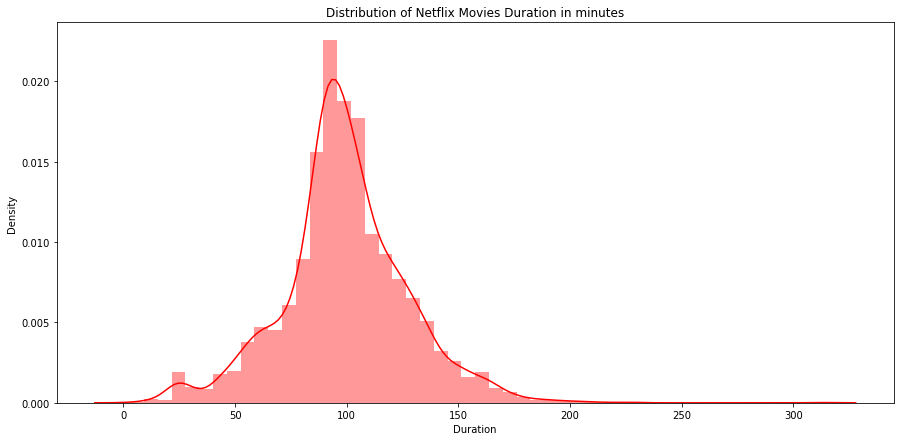

In [24]:
plt.figure(figsize=(15,7))
sns.distplot(distribution, color='green')
plt.title("Distribution of Netflix Movies Duration in minutes")
plt.xlabel('Duration')

Plot movies histogram

Text(0.5, 0, 'Duration in mins')

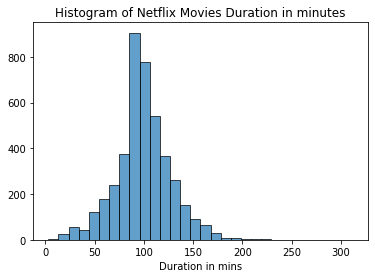

In [25]:
distribution.hist(column=0, bins=30, grid=False, alpha=0.7, edgecolor="black")
plt.title("Histogram of Netflix Movies Duration in minutes")
plt.xlabel('Duration in mins')